Logistic Regression - This is used for classification only

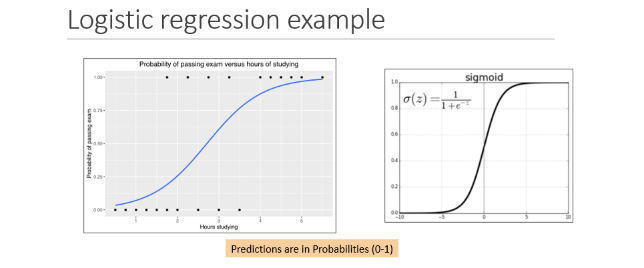

In [604]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1 : Read the train data

In [605]:
import pandas as pd 
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Step 2: Perform basic data quality checks

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [607]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [608]:
df.duplicated().sum()

1

Step 3: Seperate X and Y(species)

In [609]:
X=df.drop(columns=['species'])

In [610]:
Y=df[['species']]

In [611]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [612]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [613]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Step 4: Preprocess data for X

In [614]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [615]:
Y.dtypes

species    object
dtype: object

In [616]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [617]:
num_pipe =Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())]).set_output(transform='pandas')

In [618]:
X_pre = num_pipe.fit_transform(X)

In [619]:
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Step 5: Train test

In [620]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [621]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [622]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [623]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [624]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [625]:
xtrain.shape

(100, 4)

In [626]:
ytrain.shape

(100, 1)

Step 5: Model Building

In [627]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [628]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [629]:
model.intercept_

array([-0.1627398 ,  1.82302367, -1.66028386])

In [630]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [631]:
model.coef_

array([[-0.93728904,  1.24988548, -1.63694748, -1.61318588],
       [ 0.38686136, -0.37382492, -0.41064574, -0.59860246],
       [ 0.55042768, -0.87606056,  2.04759322,  2.21178835]])

Step 6: Model Evaluation

# Accuracy in train
# Accuracy in test

In [632]:
# Accuracy in train
model.score(xtrain, ytrain)

0.98

In [633]:
# Accuracy in test
model.score(xtest, ytest)

0.94